In [11]:
import sys
import os 

current_dir = os.getcwd()  # notebooks 
project_root = os.path.dirname(current_dir)  # chronos_dnlp 
# Add the parent directory to the Python path
sys.path.append(project_root)

In [12]:
from tiingo_data.download_data import get_daily_returns_data_cached

df = get_daily_returns_data_cached()

df.shape

(3997, 121)

In [13]:
from chronos import Chronos2Pipeline
from utils import get_device
import torch

device = get_device()

pipeline = Chronos2Pipeline.from_pretrained(
    "amazon/chronos-2",
    device_map=device,
    dtype=torch.float32, 
)

loading configuration file config.json from cache at /Users/francesco/.cache/huggingface/hub/models--amazon--chronos-2/snapshots/e19c427c73837c00b5e932da5fbfede2929677ce/config.json
Model config T5Config {
  "architectures": [
    "Chronos2Model"
  ],
  "chronos_config": {
    "context_length": 8192,
    "input_patch_size": 16,
    "input_patch_stride": 16,
    "max_output_patches": 64,
    "output_patch_size": 16,
    "quantiles": [
      0.01,
      0.05,
      0.1,
      0.15,
      0.2,
      0.25,
      0.3,
      0.35,
      0.4,
      0.45,
      0.5,
      0.55,
      0.6,
      0.65,
      0.7,
      0.75,
      0.8,
      0.85,
      0.9,
      0.95,
      0.99
    ],
    "time_encoding_scale": 8192,
    "use_arcsinh": true,
    "use_reg_token": true
  },
  "chronos_pipeline_class": "Chronos2Pipeline",
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "dtype": "float32",
  "eos_token_id": 1,
  "feed

In [15]:
dir(pipeline)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_autoregressive_unroll_for_long_horizon',
 '_get_prob_mass_per_quantile_level',
 '_predict_batch',
 '_predict_fev_window',
 '_predict_step',
 '_prepare_and_validate_context',
 '_prepare_inputs_for_long_horizon_unrolling',
 '_slide_context_and_future_covariates',
 'default_context_length',
 'dtypes',
 'embed',
 'fit',
 'forecast_type',
 'from_pretrained',
 'inner_model',
 'max_output_patches',
 'model',
 'model_context_length',
 'model_output_patch_size',
 'model_prediction_length',
 'predict',
 'predict_df',
 'predict_fev',
 'predict_quantiles',
 'quantiles',
 'save_pretrained']

In [24]:
from chronos import Chronos2Pipeline

pipe = Chronos2Pipeline.from_pretrained("amazon/chronos-2")

loading configuration file config.json from cache at /Users/francesco/.cache/huggingface/hub/models--amazon--chronos-2/snapshots/e19c427c73837c00b5e932da5fbfede2929677ce/config.json
Model config T5Config {
  "architectures": [
    "Chronos2Model"
  ],
  "chronos_config": {
    "context_length": 8192,
    "input_patch_size": 16,
    "input_patch_stride": 16,
    "max_output_patches": 64,
    "output_patch_size": 16,
    "quantiles": [
      0.01,
      0.05,
      0.1,
      0.15,
      0.2,
      0.25,
      0.3,
      0.35,
      0.4,
      0.45,
      0.5,
      0.55,
      0.6,
      0.65,
      0.7,
      0.75,
      0.8,
      0.85,
      0.9,
      0.95,
      0.99
    ],
    "time_encoding_scale": 8192,
    "use_arcsinh": true,
    "use_reg_token": true
  },
  "chronos_pipeline_class": "Chronos2Pipeline",
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "dtype": "float32",
  "eos_token_id": 1,
  "feed

In [30]:
pipe.model.config

Chronos2CoreConfig {
  "architectures": [
    "Chronos2Model"
  ],
  "chronos_config": {
    "context_length": 8192,
    "input_patch_size": 16,
    "input_patch_stride": 16,
    "max_output_patches": 64,
    "output_patch_size": 16,
    "quantiles": [
      0.01,
      0.05,
      0.1,
      0.15,
      0.2,
      0.25,
      0.3,
      0.35,
      0.4,
      0.45,
      0.5,
      0.55,
      0.6,
      0.65,
      0.7,
      0.75,
      0.8,
      0.85,
      0.9,
      0.95,
      0.99
    ],
    "time_encoding_scale": 8192,
    "use_arcsinh": true,
    "use_reg_token": true
  },
  "chronos_pipeline_class": "Chronos2Pipeline",
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "dtype": "float32",
  "feed_forward_proj": "relu",
  "initializer_factor": 0.05,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "num_heads": 12,
  "num_layers": 12,
  "pad_token_id": 0,
  "reg_token_id": 1,
  "rope_theta": 10000.

In [28]:
ChronosTokenizer?

Init signature: ChronosTokenizer()
Docstring:     
A ``ChronosTokenizer`` defines how time series are mapped into token IDs
and back.

For details, see the ``input_transform`` and ``output_transform`` methods,
which concrete classes must implement.
File:           ~/miniconda3/envs/chronos_dnlp/lib/python3.10/site-packages/chronos/chronos.py
Type:           type
Subclasses:     MeanScaleUniformBins

In [ ]:
model, tokenizer = load_chronos_components(CONFIG["model_id"], get_device())

  Loading amazon/chronos-2...


AttributeError: type object 'ChronosModel' has no attribute 'from_pretrained'

In [16]:
from chronos import ChronosModel, ChronosTokenizer

# model = ChronosModel.from_pretrained("amazon/chronos-2")

tokenizer = ChronosTokenizer.from_pretrained("amazon/chronos-2")

AttributeError: type object 'ChronosTokenizer' has no attribute 'from_pretrained'

In [17]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("amazon/chronos-2")

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /Users/francesco/.cache/huggingface/hub/models--amazon--chronos-2/snapshots/e19c427c73837c00b5e932da5fbfede2929677ce/config.json
Model config T5Config {
  "architectures": [
    "Chronos2Model"
  ],
  "chronos_config": {
    "context_length": 8192,
    "input_patch_size": 16,
    "input_patch_stride": 16,
    "max_output_patches": 64,
    "output_patch_size": 16,
    "quantiles": [
      0.01,
      0.05,
      0.1,
      0.15,
      0.2,
      0.25,
      0.3,
      0.35,
      0.4,
      0.45,
      0.5,
      0.55,
      0.6,
      0.65,
      0.7,
      0.75,
      0.8,
      0.85,
      0.9,
      0.95,
      0.99
    ],
    "time_encoding_scale": 8192,
    "use_arcsinh": true,
    "use_reg_token": true
  },
  "chronos_pipeline_class": "Chronos2Pipeline",
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "den

ImportError: 
 requires the protobuf library but it was not found in your environment. Check out the instructions on the
installation page of its repo: https://github.com/protocolbuffers/protobuf/tree/master/python#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [9]:
from transformers import AutoModelForTimeSeriesDiffusion, AutoProcessor

processor = AutoProcessor.from_pretrained("amazon/chronos-2")
model = AutoModelForTimeSeriesDiffusion.from_pretrained("amazon/chronos-2")


ImportError: cannot import name 'AutoModelForTimeSeriesDiffusion' from 'transformers' (/Users/francesco/miniconda3/envs/chronos_dnlp/lib/python3.10/site-packages/transformers/__init__.py)

In [78]:
import torch
import pandas as pd 
import matplotlib.pyplot as plt
from chronos import Chronos2Pipeline
from utils import get_device
from tiingo_data.download_data import get_daily_returns_data_cached

device = get_device()

pipeline = Chronos2Pipeline.from_pretrained(
    "amazon/chronos-2",
    device_map=device,
    torch_dtype=torch.float32, 
)
def run_cross_attention_forecast(prediction_length=30, plot_ticker="AAPL"):

    # ✅ Load full TxN returns matrix
    df = get_daily_returns_data_cached().iloc[-500:, :] #(T, N)

    if hasattr(df.columns, "nlevels") and df.columns.nlevels > 1:
        df.columns = df.columns.get_level_values(0)

    tickers = df.columns.tolist()
    df = df.dropna()  # ✅ important for Chronos

    T, N = df.shape
    print(f"Using {N} stocks with {T} days of history")

    # ✅ Convert to (B, N, T)
    # (T, N) → (N, T) → (1, N, T)
    context_data = torch.tensor(
        df.values.T, dtype=torch.float32
    ).unsqueeze(0).to(device)

    print(f"Chronos input shape: {context_data.shape}")

    print(f"--- Cross-Attention Forecast for {N} Stocks ---")

    # ✅ Multivariate prediction
    forecast = pipeline.predict(
        context_data,
        prediction_length=prediction_length,
    )

    # ✅ Output shape: (N, 9, prediction_length)
    forecast_quantiles = forecast[0].cpu().numpy()

    print(f"Forecast output shape: {forecast_quantiles.shape}")
    # (N, 9, H)

    # -----------------------------
    # SELECT ONE STOCK TO PLOT
    # -----------------------------
    stock_idx = tickers.index(plot_ticker)

    low    = forecast_quantiles[stock_idx, 0]   # 0.1
    median = forecast_quantiles[stock_idx, 4]   # 0.5
    high   = forecast_quantiles[stock_idx, 8]   # 0.9

    # -----------------------------
    # TIME INDEX
    # -----------------------------
    last_date = df.index[-1]
    forecast_index = pd.date_range(
        start=last_date,
        periods=prediction_length + 1,
        freq="B"
    )[1:]

    # -----------------------------
    # PLOT
    # -----------------------------
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[plot_ticker], label="History")
    plt.plot(forecast_index, median, label="Median Forecast", color="purple")
    plt.fill_between(
        forecast_index, low, high,
        color="purple", alpha=0.2, label="80% CI"
    )

    plt.legend()
    plt.title(f"Chronos-2 Cross-Attention Forecast for {plot_ticker}")
    plt.grid(True, alpha=0.3)
    plt.show()


Using 121 stocks with 499 days of history
Chronos input shape: torch.Size([1, 121, 499])
--- Cross-Attention Forecast for 121 Stocks ---


/Users/francesco/miniconda3/envs/chronos_dnlp/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Forecast output shape: (121, 21, 30)


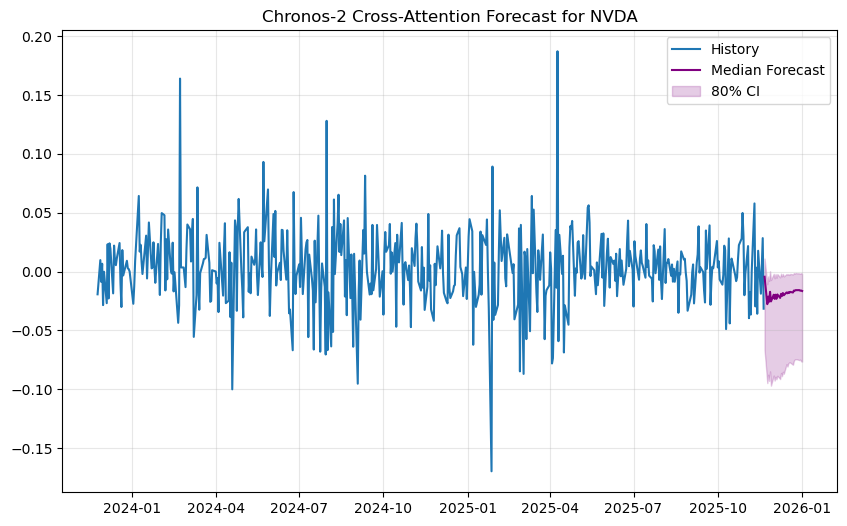

In [79]:
run_cross_attention_forecast(plot_ticker="NVDA")